<a href="https://colab.research.google.com/github/steelpipe75/kagglebook-for-colab/blob/master/ch03/ch03-06-reduction-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ---------------------------------
# データ等の準備
# ----------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MNISTデータの可視化

In [2]:
# keras.datasetsを用いてMNISTデータをダウンロードする
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 2次元データにする
train_x = train_x.reshape(train_x.shape[0], -1)

In [4]:
# 上位1000件に縮小させる
train_x = pd.DataFrame(train_x[:1000, :])
train_y = train_y[:1000]

In [5]:
# -----------------------------------
# PCA
# -----------------------------------
from sklearn.decomposition import PCA

In [6]:
# 学習データに基づいてPCAによる変換を定義
pca = PCA()
x_pca = pca.fit_transform(train_x)

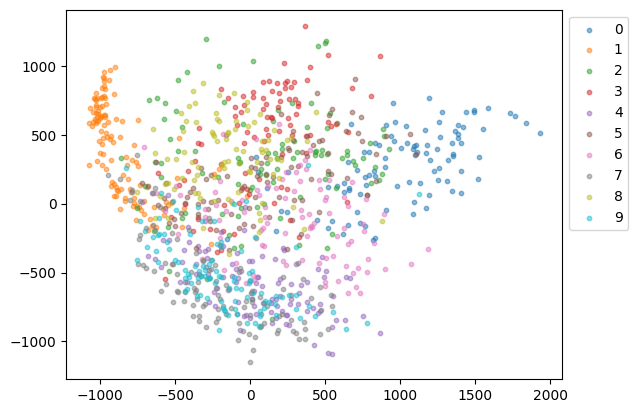

In [7]:
# クラス毎に色分けして2次元にプロット
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_pca[mask, 0], x_pca[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [8]:
plt.show()

In [9]:
# -----------------------------------
# LDA (Linear Discriminant Analysis)
# -----------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [10]:
# クラスを最も上手く分ける2軸を線形判別分析で導出
lda = LDA(n_components=2)
x_lda = lda.fit_transform(train_x, train_y)

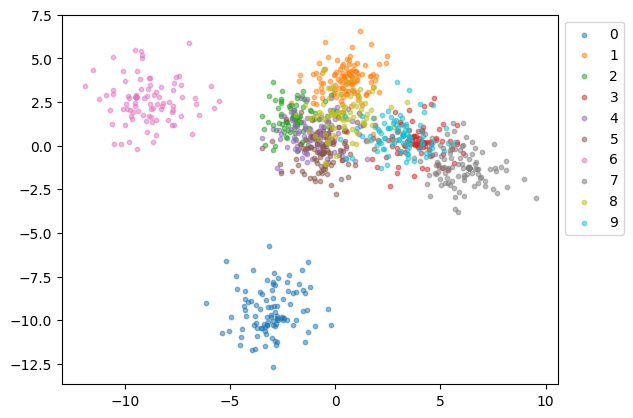

In [11]:
# クラス毎に色分けして2次元にプロット
# 良く分割しているが、目的変数を利用しているため他と比べて非常に有利な条件となっていることに注意
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_lda[mask, 0], x_lda[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [12]:
plt.show()

In [13]:
# -----------------------------------
# t-sne
# -----------------------------------
from sklearn.manifold import TSNE

In [14]:
# t-sneによる変換
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(train_x)

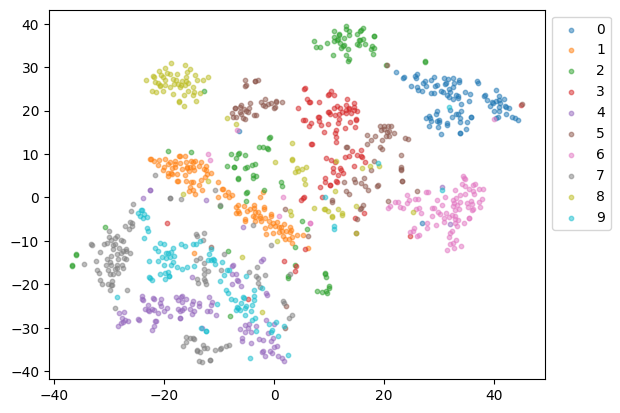

In [15]:
# クラス毎に色分けして2次元にプロット
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_tsne[mask, 0], x_tsne[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [16]:
plt.show()

In [17]:
# -----------------------------------
# UMAP
# -----------------------------------
import umap

In [18]:
# UMAPによる変換
um = umap.UMAP()
x_umap = um.fit_transform(train_x)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


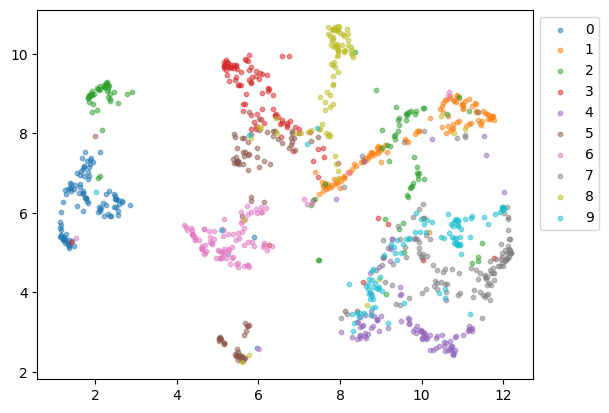

In [19]:
# クラス毎に色分けして2次元にプロット
f, ax = plt.subplots(1)
for i in range(10):
    mask = train_y == i
    plt.scatter(x_umap[mask, 0], x_umap[mask, 1], label=i, s=10, alpha=0.5)
ax.legend(bbox_to_anchor=(1.00, 1), loc='upper left')

In [20]:
plt.show()